This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [2]:
# 데이터 로드 및 Train, Test data 개수 확인
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print('number of train review : {}'.format(len(train_data)))
print('number of test review : {}'.format(len(test_data)))

number of train review : 25000
number of test review : 25000


In [3]:
# 카테고리 개수 확인
num_classes = len(set(train_labels))
print('categories : {}'.format(num_classes))

categories : 2


In [5]:
print('first train data review: ', train_data[0])
print('first train data label: ', train_labels[0])

first train data review:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
first train data label:  1


In [6]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [16]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 11s 293ms/step - loss: 0.5242 - accuracy: 0.7743 - val_loss: 0.4058 - val_accuracy: 0.8570
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3246 - accuracy: 0.8948 - val_loss: 0.3271 - val_accuracy: 0.8723
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2429 - accuracy: 0.9205 - val_loss: 0.2844 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1937 - accuracy: 0.9365 - val_loss: 0.2750 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1617 - accuracy: 0.9480 - val_loss: 0.2744 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1382 - accuracy: 0.9545 - val_loss: 0.2832 - val_accuracy: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1151 - accuracy: 0.9647 - val_loss: 0.2969 - val_accuracy: 0.8841
Epoch 8/20


In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

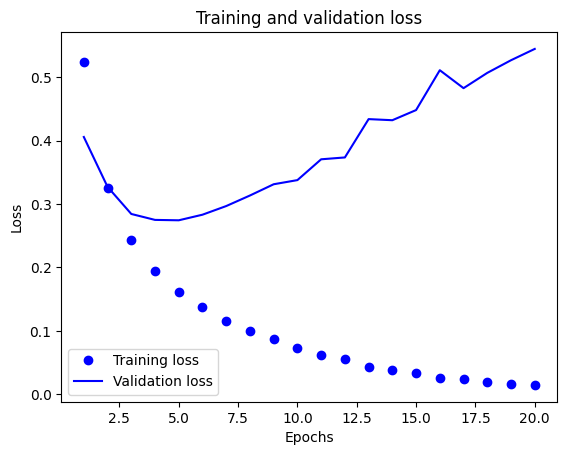

In [20]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

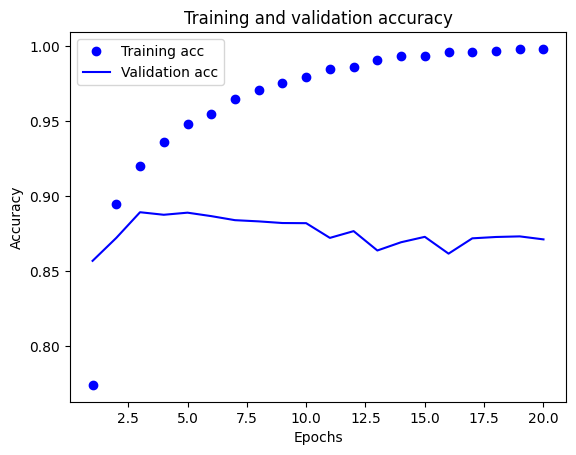

In [21]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Further Experiments

## 1st Trial

epoch값이 너무 크면 overfitting 되므로 epoch 값을 5로 조정

In [12]:
model1 = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

model1.fit(x_train, y_train, epochs=5, batch_size=512)

results = model1.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 3s 38ms/step - loss: 0.4676 - accuracy: 0.8101
Epoch 2/5
49/49 [==============================] - 2s 33ms/step - loss: 0.2714 - accuracy: 0.9023
Epoch 3/5
49/49 [==============================] - 1s 25ms/step - loss: 0.2114 - accuracy: 0.9247
Epoch 4/5
49/49 [==============================] - 1s 25ms/step - loss: 0.1813 - accuracy: 0.9354
Epoch 5/5
782/782 [==============================] - 3s 3ms/step - loss: 0.3072 - accuracy: 0.8798


In [13]:
print('Test loss: ', results[0])
print('Test accuracy: ', results[1])

Test loss:  0.307210773229599
Test accuracy:  0.8797600269317627


## 2nd Trial

We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.

In [15]:
model2_1 = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])

model2_1.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

model2_1.fit(x_train, y_train, epochs=5, batch_size=512)

results = model2_1.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 2s 33ms/step - loss: 0.4872 - accuracy: 0.8179
Epoch 2/5
49/49 [==============================] - 1s 30ms/step - loss: 0.3144 - accuracy: 0.8920
Epoch 3/5
49/49 [==============================] - 1s 29ms/step - loss: 0.2535 - accuracy: 0.9114
Epoch 4/5
49/49 [==============================] - 1s 30ms/step - loss: 0.2199 - accuracy: 0.9230
Epoch 5/5
782/782 [==============================] - 2s 3ms/step - loss: 0.2989 - accuracy: 0.8777


In [16]:
print('Test loss: ', results[0])
print('Test accuracy: ', results[1])

Test loss:  0.29894188046455383
Test accuracy:  0.8777199983596802


In [14]:
model2_2 = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])

model2_2.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

model2_2.fit(x_train, y_train, epochs=5, batch_size=512)

results = model2_2.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 2s 27ms/step - loss: 0.5039 - accuracy: 0.7804
Epoch 2/5
49/49 [==============================] - 1s 25ms/step - loss: 0.2747 - accuracy: 0.8995
Epoch 3/5
49/49 [==============================] - 1s 25ms/step - loss: 0.2088 - accuracy: 0.9234
Epoch 4/5
49/49 [==============================] - 1s 28ms/step - loss: 0.1740 - accuracy: 0.9369
Epoch 5/5
782/782 [==============================] - 2s 3ms/step - loss: 0.3304 - accuracy: 0.8757


In [15]:
print('Test loss: ', results[0])
print('Test accuracy: ', results[1])

Test loss:  0.3303819000720978
Test accuracy:  0.8756800293922424


## 3rd Trial

Try to use layers with more hidden units or less hidden units: 8 units, 32 units, 64 units...

In [8]:
model3_1 = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model3_1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model3_1.fit(x_train, y_train, epochs=4, batch_size=512)
results = model3_1.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.4933 - accuracy: 0.8066
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2871 - accuracy: 0.9001
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2200 - accuracy: 0.9208
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3135 - accuracy: 0.8744


In [9]:
print('Test loss: ', results[0])
print('Test accuracy: ', results[1])

Test loss:  0.3134717047214508
Test accuracy:  0.8743600249290466


In [10]:
model3_2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model3_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model3_2.fit(x_train, y_train, epochs=4, batch_size=512)
results = model3_2.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 34ms/step - loss: 0.4730 - accuracy: 0.7906
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2678 - accuracy: 0.8987
Epoch 3/4
49/49 [==============================] - 2s 45ms/step - loss: 0.2095 - accuracy: 0.9215
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2977 - accuracy: 0.8828


In [11]:
print('Test loss: ', results[0])
print('Test accuracy: ', results[1])

Test loss:  0.2976745367050171
Test accuracy:  0.8827999830245972


In [13]:
model3_3 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model3_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model3_3.fit(x_train, y_train, epochs=4, batch_size=512)
results = model3_3.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 50ms/step - loss: 0.4674 - accuracy: 0.7749
Epoch 2/4
49/49 [==============================] - 2s 46ms/step - loss: 0.2617 - accuracy: 0.8981
Epoch 3/4
49/49 [==============================] - 4s 73ms/step - loss: 0.2133 - accuracy: 0.9163
Epoch 4/4
782/782 [==============================] - 4s 5ms/step - loss: 0.3146 - accuracy: 0.8733


In [14]:
print('Test loss: ', results[0])
print('Test accuracy: ', results[1])

Test loss:  0.3145624101161957
Test accuracy:  0.8732799887657166


## 4th Trial

Try to use the mse loss function instead of binary_crossentropy.

In [10]:
model4 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model4.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model4.fit(x_train, y_train, epochs=4, batch_size=512)
results = model4.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.1843 - accuracy: 0.7632
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.0967 - accuracy: 0.8909
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.0681 - accuracy: 0.9178
Epoch 4/4
782/782 [==============================] - 5s 6ms/step - loss: 0.0980 - accuracy: 0.8668


In [11]:
print('Test loss: ', results[0])
print('Test accuracy: ', results[1])

Test loss:  0.09799718111753464
Test accuracy:  0.8668000102043152


## 5th Trial

Try to use the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.


In [12]:
model5 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="tanh")
])
model5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model5.fit(x_train, y_train, epochs=4, batch_size=512)
results = model5.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.6423 - accuracy: 0.7472
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.3408 - accuracy: 0.8906
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2767 - accuracy: 0.9126
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.5144 - accuracy: 0.8749


In [13]:
print('Test loss: ', results[0])
print('Test accuracy: ', results[1])

Test loss:  0.5143893957138062
Test accuracy:  0.8749200105667114


# Conclusion

* There's usually quite a bit of preprocessing you need to do on
your raw data in order to be able to feed it -- as tensors -- into a neural network. In the case of sequences of words, they can be encoded as binary vectors -- but there are other encoding options too.
* Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you will likely use them frequently.
* In a binary classification problem (two output classes), your network should end with a Dense layer with 1 unit and a sigmoid activation, i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is binary_crossentropy.
The rmsprop optimizer is generally a good enough choice of optimizer, whatever your problem. That's one less thing for you to worry about.
* As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data never-seen-before. Make sure to always monitor performance on data that is outside of the training set.